In [96]:
# import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score,classification_report,confusion_matrix

Source of Data

In [97]:
# Get CVX stock data from Yahoo Finance csv file.
cvx_df = pd.read_csv('CVX.csv')
cvx_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,78.199997,79.199997,78.160004,79.059998,48.064476,10173800
1,2010-01-05,79.220001,79.620003,78.720001,79.620003,48.404930,10593700
2,2010-01-06,79.440002,80.000000,79.190002,79.629997,48.410995,11014600
3,2010-01-07,79.360001,79.699997,78.970001,79.330002,48.228630,9626900
4,2010-01-08,79.120003,79.470001,78.889999,79.470001,48.313732,5624300
...,...,...,...,...,...,...,...
3114,2022-05-17,174.839996,175.649994,172.610001,174.029999,172.610001,12827600
3115,2022-05-18,174.119995,174.130005,165.789993,168.059998,168.059998,13107500
3116,2022-05-19,164.630005,169.639999,162.830002,166.860001,166.860001,10958700
3117,2022-05-20,168.880005,171.039993,164.089996,167.820007,167.820007,9613200


Data Pre-Processing

In [98]:
# convert date and create new feature 

cvx_df["Date"] = pd.to_datetime(cvx_df["Date"])

cvx_df["days"] = (cvx_df["Date"]-cvx_df["Date"][0]).dt.days

In [99]:
# remove empty/unneeded columns
cvx_df=cvx_df.drop(columns=['Adj Close','Low','High'])

In [100]:
cvx_df

,Date,Open,Close,Volume,days
0,2010-01-04,78.199997,79.059998,10173800,0
1,2010-01-05,79.220001,79.620003,10593700,1
2,2010-01-06,79.440002,79.629997,11014600,2
3,2010-01-07,79.360001,79.330002,9626900,3
4,2010-01-08,79.120003,79.470001,5624300,4
...,...,...,...,...,...
3114,2022-05-17,174.839996,174.029999,12827600,4516
3115,2022-05-18,174.119995,168.059998,13107500,4517
3116,2022-05-19,164.630005,166.860001,10958700,4518
3117,2022-05-20,168.880005,167.820007,9613200,4519


In [63]:
# Find number of trading days and columns
cvx_df.shape

(3119, 4)

<AxesSubplot:>

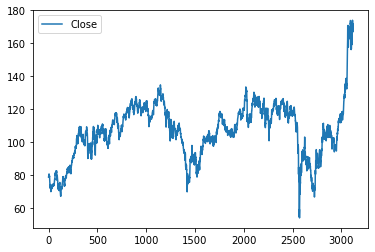

In [64]:
# plot the closing price data
cvx_df.plot.line(y="Close",use_index=True)

In [101]:
cvx_df.describe()

,Open,Close,Volume,days
count,3119.000000,3119.000000,3.119000e+03,3119.000000
mean,107.026730,107.041449,8.211013e+06,2260.565887
std,17.122328,17.157665,4.107513e+06,1306.875151
min,55.259998,54.220001,1.587800e+06,0.000000
25%,97.209999,97.360000,5.518450e+06,1130.500000
50%,108.000000,108.029999,7.150000e+06,2262.000000
75%,118.334999,118.209999,9.804550e+06,3393.000000
max,174.839996,174.029999,5.723100e+07,4522.000000


In [102]:
cvx_df.value_counts()

Date        Open        Close       Volume    days
2010-01-04  78.199997   79.059998   10173800  0       1
2018-05-01  124.029999  124.860001  7093700   3039    1
2018-03-29  112.290001  114.040001  6627800   3006    1
2018-04-02  113.889999  112.239998  6228600   3010    1
2018-04-03  112.519997  114.830002  6717300   3011    1
                                                     ..
2014-02-25  114.370003  114.970001  5976100   1513    1
2014-02-26  114.820000  115.510002  6113800   1514    1
2014-02-27  115.660004  115.690002  4922600   1515    1
2014-02-28  115.870003  115.330002  6944600   1516    1
2022-05-23  169.429993  171.720001  10216400  4522    1
Length: 3119, dtype: int64

Target Variable

In [103]:
# create new target column
cvx_df['Buy_Sell'] = np.where(cvx_df['Close'].shift(-1) > cvx_df['Close'], 1, 0)
cvx_df.head()

,Date,Open,Close,Volume,days,Buy_Sell
0,2010-01-04,78.199997,79.059998,10173800,0,1
1,2010-01-05,79.220001,79.620003,10593700,1,1
2,2010-01-06,79.440002,79.629997,11014600,2,0
3,2010-01-07,79.360001,79.330002,9626900,3,1
4,2010-01-08,79.120003,79.470001,5624300,4,1


Data Analysis

In [104]:
cvx_df.isnull()

,Date,Open,Close,Volume,days,Buy_Sell
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
3114,False,False,False,False,False,False
3115,False,False,False,False,False,False
3116,False,False,False,False,False,False
3117,False,False,False,False,False,False


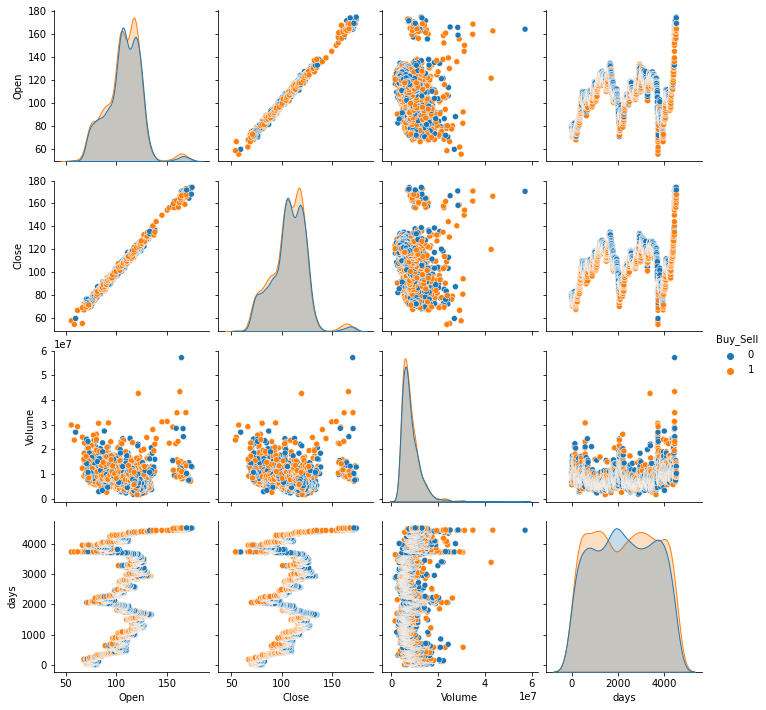

In [105]:
# visulize the data using seaborn pairplots
k= sns.pairplot(cvx_df, hue='Buy_Sell',diag_kws={'bw': 0.2})

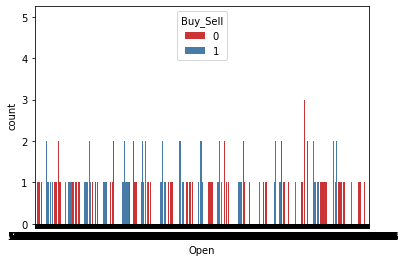

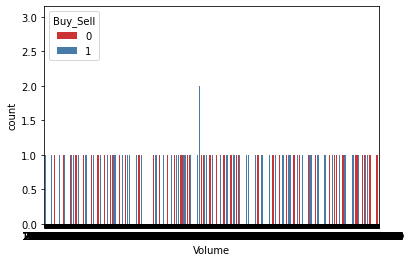

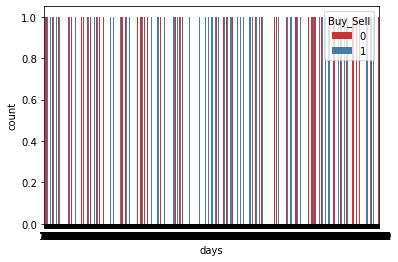

In [70]:
# investigate features by the Buy_Sell column
Features = ['Open','Volume','days']
for f in Features:
    plt.figure()
    cx = sns.countplot(x=f, data = cvx_df, hue = 'Buy_Sell', palette= "Set1")

Convert dataframe to csv file for tableau dashboard

In [106]:
# convert dataframe to csv file and save file
output_file_path = "cvx_df.csv"
cvx_df.to_csv(output_file_path, index=False)

Split the data into features and target data

In [72]:
X = cvx_df[Features].values
y = cvx_df['Buy_Sell'].values

Split the data into training and testing data

In [73]:
# split the data into training and testing. print testing and train x, and y values.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2495, 3)
(624, 3)
(2495,)
(624,)


Scale the data

In [75]:
# Create StandardScaler instance
scaler = StandardScaler()
# fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Run Decision tree classifier model

In [76]:
# create and train the model(decisiontreeclassifier)
tree = DecisionTreeClassifier().fit(X_train, y_train)

# Show how model performed on test data set
print(tree.score(X_test, y_test))

0.5208333333333334


In [77]:
# show models predicitions
tree_predicitons = tree.predict(X_test)
print(tree_predicitons)

[1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0
 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0
 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1
 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0
 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1
 1 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1
 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1
 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0
 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0
 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1
 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1
 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 0 1 0 1 

In [78]:
# show actual values
y_test

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,

In [79]:
tree_predicitons = pd.Series(tree_predicitons)
tree_predicitons

0      1
1      1
2      0
3      1
4      0
      ..
619    1
620    1
621    0
622    1
623    1
Length: 624, dtype: int32

In [80]:
treeClassifier = DecisionTreeClassifier(max_depth=3,min_samples_leaf=5)
treeClassifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [81]:
y_pred = treeClassifier.predict(X_test)

In [82]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.01      0.03       308
           1       0.51      0.99      0.67       316

    accuracy                           0.51       624
   macro avg       0.59      0.50      0.35       624
weighted avg       0.59      0.51      0.35       624



In [83]:
# find accuracy scores for training and testing
print("Training Accuracy is: ", tree.score(X_train,y_train))
print("Testing Accuracy is: ",tree.score(X_test,y_test))

Training Accuracy is:  1.0
Testing Accuracy is:  0.5208333333333334


RandomForestClassifier model

In [84]:
# create and run random forest classifier
cvx_rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
cvx_rf.fit(X_train,y_train)
prediction_test = cvx_rf.predict(X=X_test)

# Accuracy on testing
print("Training Accuracy is: ", cvx_rf.score(X_train,y_train))
# Accuracy on taining
print("Testing Accuracy is: ", cvx_rf.score(X_test,y_test))

# confusion matrix
cvx_cm = confusion_matrix(y_test, prediction_test)
cvx_cm_norm = cvx_cm/cvx_cm.sum(axis=1)[:,np.newaxis]
plt.figure()
plt.cvx_cm_norm, classes=cvx_rf.classes_

Training Accuracy is:  1.0
Testing Accuracy is:  0.5096153846153846


<Figure size 432x288 with 0 Axes>

Deep Neural Network

In [92]:
# Create deep neural netwrok model
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2= 5

nn = tf.keras.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 32        
                                                                 
 dense_7 (Dense)             (None, 5)                 45        
                                                                 
 dense_8 (Dense)             (None, 1)                 6         
                                                                 
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


In [93]:
# compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [94]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
78/78 [==============================] - 4s 1ms/step - loss: 0.7169 - accuracy: 0.5034
Epoch 2/100
78/78 [==============================] - 0s 1ms/step - loss: 0.7008 - accuracy: 0.5026
Epoch 3/100
78/78 [==============================] - 0s 1ms/step - loss: 0.6970 - accuracy: 0.4974
Epoch 4/100
78/78 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.4998
Epoch 5/100
78/78 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5062
Epoch 6/100
78/78 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5214
Epoch 7/100
78/78 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.5134
Epoch 8/100
78/78 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5158
Epoch 9/100
78/78 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5154
Epoch 10/100
78/78 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.5166
Epoch 11/

In [95]:
# Evaluate the model using the testing data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

20/20 - 3s - loss: 0.6888 - accuracy: 0.5417 - 3s/epoch - 171ms/step
Loss: 0.6887835264205933, Accuracy: 0.5416666865348816


In [122]:
# Create deep neural netwrok model#2
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2= 5

nn = tf.keras.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid"))
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="tanh"))
# Check the structure of the model
nn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 8)                 32        
                                                                 
 dense_25 (Dense)            (None, 5)                 45        
                                                                 
 dense_26 (Dense)            (None, 1)                 6         
                                                                 
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


In [123]:
# compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]) 


In [124]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
78/78 [==============================] - 0s 2ms/step - loss: 0.7606 - accuracy: 0.4970
Epoch 2/100
78/78 [==============================] - 0s 2ms/step - loss: 0.7072 - accuracy: 0.5106
Epoch 3/100
78/78 [==============================] - 0s 2ms/step - loss: 0.6978 - accuracy: 0.4986
Epoch 4/100
78/78 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.5186
Epoch 5/100
78/78 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5202
Epoch 6/100
78/78 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5230
Epoch 7/100
78/78 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5186
Epoch 8/100
78/78 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5190
Epoch 9/100
78/78 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5202
Epoch 10/100
78/78 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5218
Epoch 11/

In [125]:
# Evaluate the model using the testing data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

20/20 - 0s - loss: 0.6914 - accuracy: 0.5449 - 113ms/epoch - 6ms/step
Loss: 0.6914377212524414, Accuracy: 0.5448718070983887


In [160]:
# confusion matrix
cvx_cm = confusion_matrix(y_test, prediction_test)
cvx_cm


array([[141, 167],
       [139, 177]], dtype=int64)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 8)                 32        
                                                                 
 dense_51 (Dense)            (None, 5)                 45        
                                                                 
 dense_52 (Dense)            (None, 3)                 18        
                                                                 
 dense_53 (Dense)            (None, 1)                 4         
                                                                 
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________


In [149]:
# compile the model
# nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]) 

In [150]:
# Train the model
# fit_model = nn.fit(X_train_scaled,y_train,epochs=200)

Epoch 1/200
78/78 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5006
Epoch 2/200
78/78 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5130
Epoch 3/200
78/78 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5158
Epoch 4/200
78/78 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5194
Epoch 5/200
78/78 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5194
Epoch 6/200
78/78 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5210
Epoch 7/200
78/78 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5182
Epoch 8/200
78/78 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5142
Epoch 9/200
78/78 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5222
Epoch 10/200
78/78 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5090
Epoch 11/

In [151]:
# Evaluate the model using the testing data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

20/20 - 0s - loss: 0.6905 - accuracy: 0.5304 - 123ms/epoch - 6ms/step
Loss: 0.690549373626709, Accuracy: 0.5304487347602844


In [153]:
# Create deep neural netwrok model#4
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 12
hidden_nodes_layer2= 8
hidden_nodes_layer3= 5
hidden_node_layer4= 3

nn = tf.keras.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid"))
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))
# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))
# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 12)                48        
                                                                 
 dense_59 (Dense)            (None, 8)                 104       
                                                                 
 dense_60 (Dense)            (None, 5)                 45        
                                                                 
 dense_61 (Dense)            (None, 5)                 30        
                                                                 
 dense_62 (Dense)            (None, 1)                 6         
                                                                 
Total params: 233
Trainable params: 233
Non-trainable params: 0
_________________________________________________________________


In [154]:
# compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]) 

In [155]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=400)

Epoch 1/400
78/78 [==============================] - 1s 2ms/step - loss: 0.7029 - accuracy: 0.5150
Epoch 2/400
78/78 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5130
Epoch 3/400
78/78 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5259
Epoch 4/400
78/78 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5158
Epoch 5/400
78/78 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5166
Epoch 6/400
78/78 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5086
Epoch 7/400
78/78 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5142
Epoch 8/400
78/78 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5086
Epoch 9/400
78/78 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5186
Epoch 10/400
78/78 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5078
Epoch 11/

In [156]:
# Evaluate the model using the testing data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

20/20 - 0s - loss: 0.6914 - accuracy: 0.5417 - 119ms/epoch - 6ms/step
Loss: 0.6914278268814087, Accuracy: 0.5416666865348816
